In [10]:
import numpy as np

class GradientDescentOptimizer:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update_parameters(self, params, grads):
        updated_params = []
        for param, grad in zip(params, grads):
            updated_param = param - self.learning_rate * grad
            updated_params.append(updated_param)

        return updated_params


In [11]:
class AdamOptimizer:
    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update_parameters(self, params, grads):
        if self.m is None:
            self.m = [np.zeros_like(param) for param in params]
            self.v = [np.zeros_like(param) for param in params]

        self.t += 1
        learning_rate_t = self.learning_rate * np.sqrt(1 - self.beta2**self.t) / (1 - self.beta1**self.t)

        updated_params = []
        for i, (param, grad) in enumerate(zip(params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (grad**2)

            m_hat = self.m[i] / (1 - self.beta1**self.t)
            v_hat = self.v[i] / (1 - self.beta2**self.t)

            updated_param = param - learning_rate_t * m_hat / (np.sqrt(v_hat) + self.epsilon)
            updated_params.append(updated_param)

        return updated_params


In [12]:
def quadratic_function(x):
    return np.sum(x**2)

def quadratic_gradient(x):
    return 2 * x

params = [np.array([3.0, 4.0])]

gd_optimizer = GradientDescentOptimizer(learning_rate=0.1)
adam_optimizer = AdamOptimizer(learning_rate=0.1)

num_iterations = 100
for i in range(num_iterations):

    grads = [quadratic_gradient(param) for param in params]

    params = gd_optimizer.update_parameters(params, grads)

    params = adam_optimizer.update_parameters(params, grads)

    if (i + 1) % 10 == 0:
        print(f"Iteration {i+1}: Quadratic function value = {quadratic_function(params[0])}")

print("Final parameters:")
print(params)


Iteration 10: Quadratic function value = 0.20269496384229077
Iteration 20: Quadratic function value = 0.0001291136614038911
Iteration 30: Quadratic function value = 0.0002605882777300969
Iteration 40: Quadratic function value = 7.032567435535811e-05
Iteration 50: Quadratic function value = 1.0499556208254644e-05
Iteration 60: Quadratic function value = 1.1839246291123527e-06
Iteration 70: Quadratic function value = 1.0682837047815161e-07
Iteration 80: Quadratic function value = 7.773973159234603e-09
Iteration 90: Quadratic function value = 4.5155841455914144e-10
Iteration 100: Quadratic function value = 2.0412942195653446e-11
Final parameters:
[array([-1.20594214e-06, -4.35415270e-06])]


In [13]:
def quadratic_function(x):
    return np.sum(x**2)

def quadratic_gradient(x):
    return 2 * x


Iteration 10: GD function value = 0.21617897898500732, Adam function value = 0.20269496384229077
Iteration 20: GD function value = 0.0002939312228035185, Adam function value = 0.0001291136614038911
Iteration 30: GD function value = 0.00017570848887875243, Adam function value = 0.0002605882777300969
Iteration 40: GD function value = 5.3248044056338075e-05, Adam function value = 7.032567435535811e-05
Iteration 50: GD function value = 8.245578519290068e-06, Adam function value = 1.0499556208254644e-05
Iteration 60: GD function value = 9.523632113421812e-07, Adam function value = 1.1839246291123527e-06
Iteration 70: GD function value = 8.780365531976772e-08, Adam function value = 1.0682837047815161e-07
Iteration 80: GD function value = 6.529981760004603e-09, Adam function value = 7.773973159234603e-09
Iteration 90: GD function value = 3.882788999595578e-10, Adam function value = 4.5155841455914144e-10
Iteration 100: GD function value = 1.8028724868903022e-11, Adam function value = 2.041294

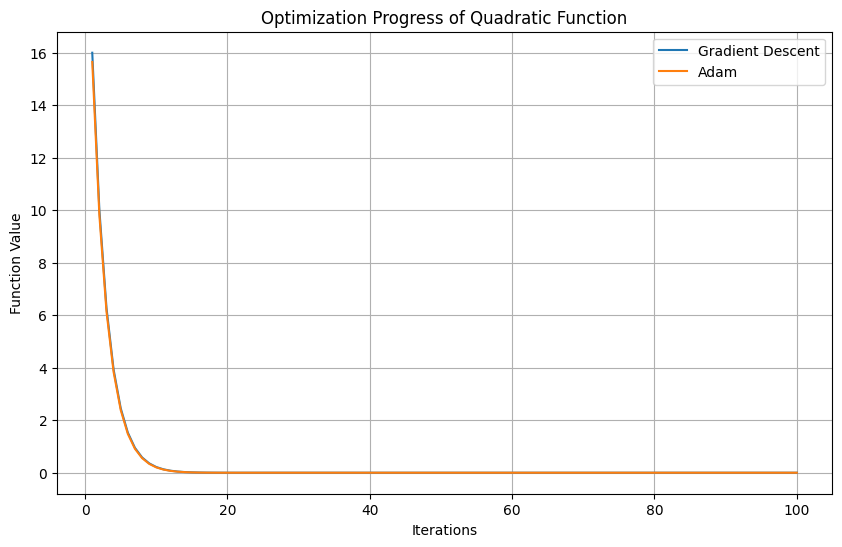

In [14]:
initial_params = [np.array([3.0, 4.0])]

gd_optimizer = GradientDescentOptimizer(learning_rate=0.1)
adam_optimizer = AdamOptimizer(learning_rate=0.1)

num_iterations = 100

gd_function_values = []
adam_function_values = []

for i in range(num_iterations):
    grads = [quadratic_gradient(param) for param in initial_params]

    updated_params_gd = gd_optimizer.update_parameters(initial_params, grads)
    initial_params = updated_params_gd

    function_value_gd = quadratic_function(initial_params[0])
    gd_function_values.append(function_value_gd)

    updated_params_adam = adam_optimizer.update_parameters(initial_params, grads)
    initial_params = updated_params_adam

    function_value_adam = quadratic_function(initial_params[0])
    adam_function_values.append(function_value_adam)

    if (i + 1) % 10 == 0:
        print(f"Iteration {i+1}: GD function value = {function_value_gd}, Adam function value = {function_value_adam}")

print("Final parameters:")
print("Gradient Descent:", initial_params)
print("Adam:", initial_params)

import matplotlib.pyplot as plt

iterations = np.arange(1, num_iterations + 1)
plt.figure(figsize=(10, 6))
plt.plot(iterations, gd_function_values, label='Gradient Descent')
plt.plot(iterations, adam_function_values, label='Adam')
plt.title('Optimization Progress of Quadratic Function')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()
